# Linear Regression


#  1.Import and preprocess the dataset.


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [133]:
df = pd.read_csv(r"C:\Users\kulso\Downloads\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [134]:
print(df.isnull().sum())  #no missing values found

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [135]:
# linear regression
X = df[['area']] # feature
y = df['price']   # target

In [136]:
# multiple lr
w = df[['area', 'bedrooms', 'parking']]
z = df['price']

# 2.Split data into train-test sets.

In [137]:
#linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
#multiple
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size=0.2, random_state=42)

#  3.Fit a Linear Regression model using sklearn.linear_model.

In [139]:
#LR
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [140]:
#MLR
model2 = LinearRegression()
model2.fit(w_train, z_train)

LinearRegression()

In [141]:
#predicting price for LR
y_pred = model.predict(X_test)

In [142]:
#predicting price for MLR
z_pred = model2.predict(w_test)

#  4.Evaluate model using MAE, MSE, R².

In [151]:
#LR
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R² Score: 0.27287851871974644


In [144]:
# MLR
mae = mean_absolute_error(z_test, z_pred)
mse = mean_squared_error(z_test, z_pred)
r2 = r2_score(z_test, z_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1353577.3665463636
Mean Squared Error (MSE): 3107699653082.3877
R² Score: 0.3851703504723213


# 5.Plot regression line and interpret coefficients.

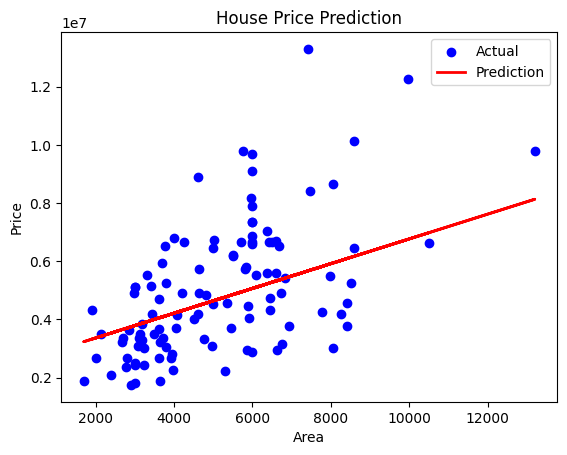

In [145]:
#LR
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()


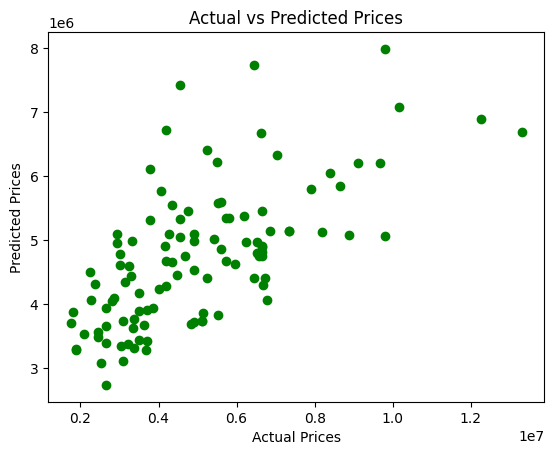

In [146]:
#plotting for multiple lr

plt.scatter(z_test, z_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [147]:
df_compare = pd.DataFrame({'Actual': z_test, 'Predicted': z_pred})
print(df_compare)

      Actual     Predicted
316  4060000  5.766316e+06
77   6650000  4.912808e+06
360  3710000  3.426157e+06
90   6440000  4.404798e+06
493  2800000  4.052578e+06
..       ...           ...
15   9100000  6.203381e+06
357  3773000  6.115149e+06
39   7910000  5.800183e+06
54   7350000  5.146669e+06
155  5530000  5.583733e+06

[109 rows x 2 columns]


In [148]:
#Intercept and coefficients for LR
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 2512254.2639593435
Coefficients: [425.72984194]


In [149]:
#intercept and coefficirnt for MLR
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

Intercept: 750888.6191814151
Coefficients: [3.38672964e+02 6.53514899e+05 4.03197411e+05]
